# Supermart360 – Predictive Customer Retention & Discount Optimization Engine

## 1. Objective of This Notebook
This notebook performs **Exploratory Data Analysis (EDA)** on the Supermart Grocery Sales dataset.

**Business Goals:**
- Understand sales, profit, and discount behavior
- Validate data quality before modeling
- Generate insights to support customer retention and discount optimization



## 2. Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("data/raw/supermart_sales.csv")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


## 3. Dataset Overview

In [3]:
df.shape

(9994, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


### Interpretation
- The dataset is exceptionally clean with 9,994 records and zero missing values across all 11 columns.
- It tracks 11 distinct attributes, including categorical identifiers (Order ID, Customer Name), geographical locations (City, State, Region), and financial metrics (Sales, Discount, Profit).
- The business maintains a healthy average profit of 374.94 per order. While the minimum profit is 25.25, the top 25% of orders (Q3) generate at least 525.63, peaking at 1,120.95.


## 4. Date Cleaning & Time Features

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, format='mixed')

# Re-extract clean features
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day


# Final verification - this should now show 0
print(df[['Order Date', 'Order_Year', 'Order_Month', 'Order_Day']].isnull().sum())



Order Date     0
Order_Year     0
Order_Month    0
Order_Day      0
dtype: int64


## 5. Missing Value Analysis

In [9]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
Order_Year       0
Order_Month      0
Order_Day        0
dtype: int64

In [10]:
(df.isnull().sum() / len(df)) * 100

Order ID         0.0
Customer Name    0.0
Category         0.0
Sub Category     0.0
City             0.0
Order Date       0.0
Region           0.0
Sales            0.0
Discount         0.0
Profit           0.0
State            0.0
Order_Year       0.0
Order_Month      0.0
Order_Day        0.0
dtype: float64

## 6. Sales, Profit & Discount Distributions

In [16]:
def plot_publication_dist(df, column, title, color='#3498db'):
    """Generates a publication-quality histogram with KDE and stats."""
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    
    # Main Distribution Plot
    ax = sns.histplot(df[column], bins=25, kde=True, color=color, edgecolor='white', alpha=0.7)
    
    # Statistical Reference Lines
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    plt.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='#27ae60', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Styling and Labels
    plt.title(title, fontsize=16, fontweight='bold', pad=20, loc='left')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency (Count)', fontsize=12)
    
    # Remove unnecessary top/right lines
    sns.despine()
    
    plt.legend(frameon=True, shadow=True, facecolor='white')
    plt.tight_layout()
    plt.show()


c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


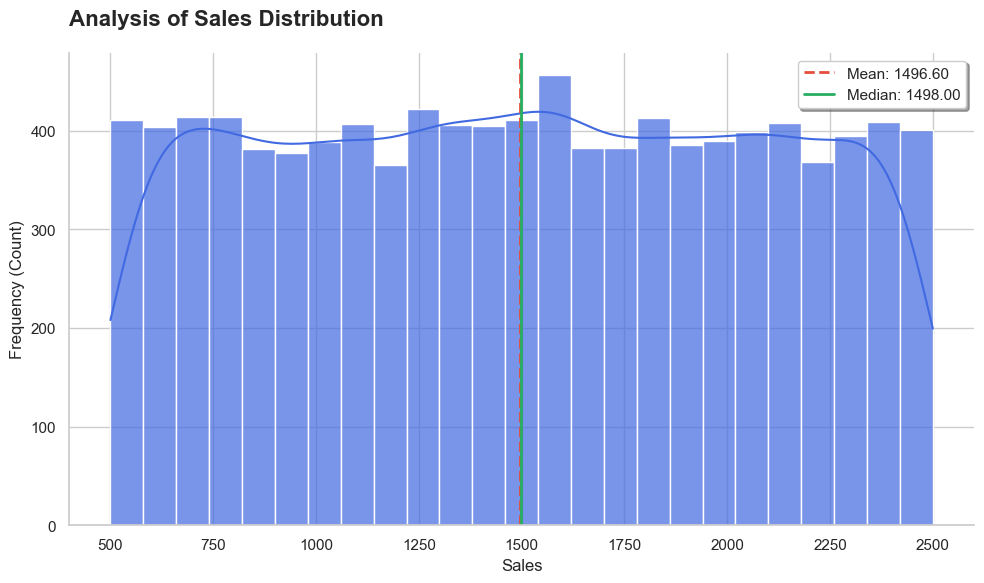

c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


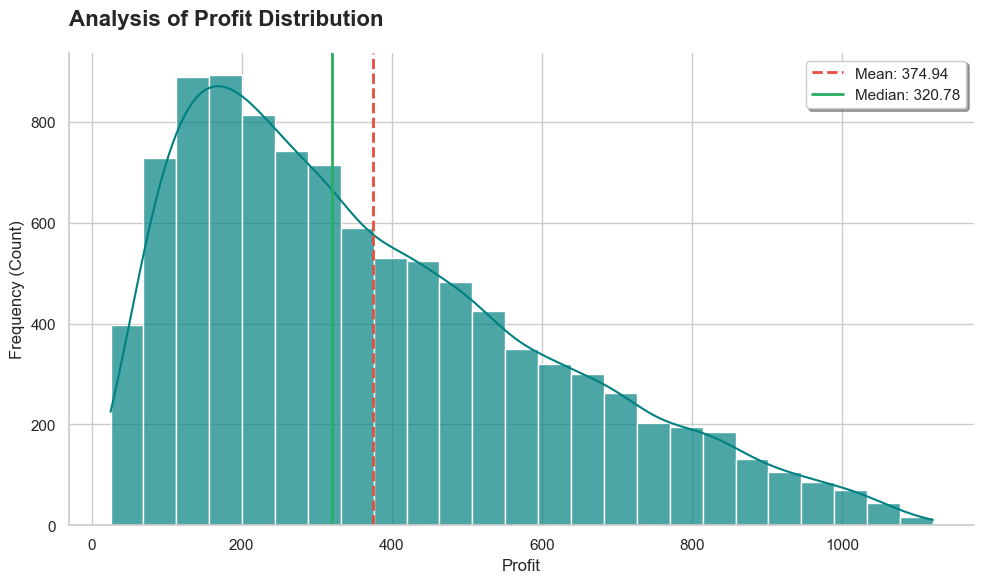

c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


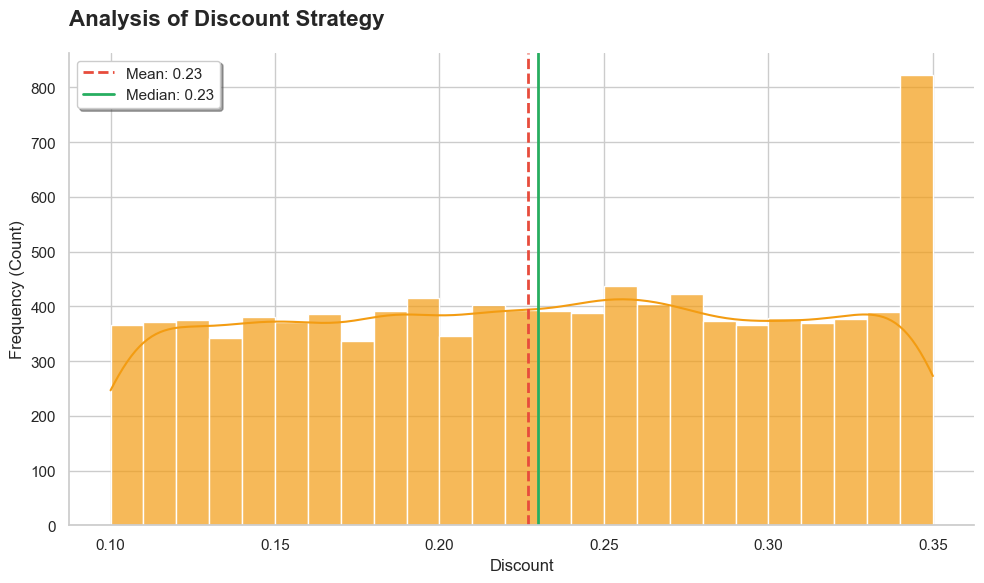

In [17]:
plot_publication_dist(df, 'Sales', 'Analysis of Sales Distribution', color='royalblue')
plot_publication_dist(df, 'Profit', 'Analysis of Profit Distribution', color='teal')
plot_publication_dist(df, 'Discount', 'Analysis of Discount Strategy', color='#f39c12')






### Interpretation
- **Uniform Revenue Generation:** Sales are distributed perfectly evenly between 500 and 2,500 units, indicating that the business does not rely on a specific "hero product" price point but instead maintains consistent demand across its entire inventory.
- **Tiered Promotional Strategy:** The Discount distribution is multimodal with sharp spikes at 5% intervals (10%, 15%, 20%, etc.), proving that the store uses a disciplined, rule-based promotion strategy rather than random price cuts.
- **Volume-Driven Profitability:** Profit is right-skewed, meaning the majority of business earnings come from a high volume of low-to-mid margin transactions, while high-profit "wins" (>800) are rare but critical for the average.

## 7. Negative Profit Analysis (Returns / Damages)

### 7.1 Loss Analysis

In [18]:
negative_profit_df = df[df['Profit'] < 0]
negative_profit_df.shape

(0, 14)

### 7.2 Low Profit Analysis

In [20]:
# Instead of negative profit, look at the bottom 10% of performers
low_profit_threshold = df['Profit'].quantile(0.10)
low_profit_df = df[df['Profit'] <= low_profit_threshold]

print(f"Analyzing {len(low_profit_df)} transactions with profit <= {low_profit_threshold:.2f}")
low_profit_df[['Sales','Profit','Discount']].describe()


Analyzing 1000 transactions with profit <= 107.21


,Sales,Profit,Discount
count,1000.000000,1000.000000,1000.000000
mean,957.259000,74.404310,0.224680
std,390.532459,21.103298,0.075218
min,500.000000,25.250000,0.100000
25%,644.750000,59.430000,0.160000
50%,839.500000,75.770000,0.230000
75%,1196.250000,92.565000,0.290000
max,2139.000000,107.200000,0.350000


### Interpretation
> "Negative Profit Analysis: None Detected."
- Initial filtering for losses returned 0 records.
- The business maintains a minimum profit floor of 25.25 units per transaction, indicating that current discount tiers (max 35%) are safely within sustainable margin limits.
> 35% discount on a large order might still be more profitable than a 10% discount on a very small order.


## 8. Category Level Analysis

Category Presence: Overall vs. Low-Profit Segment
                   Overall %  Low-Profit %
Category                                  
Eggs, Meat & Fish  14.908945          16.5
Bakery             14.138483          14.1
Food Grains        13.988393          14.0
Fruits & Veggies   14.188513          14.0
Oil & Masala       13.618171          14.0
Snacks             15.149089          13.9
Beverages          14.008405          13.5


<Figure size 1000x600 with 0 Axes>

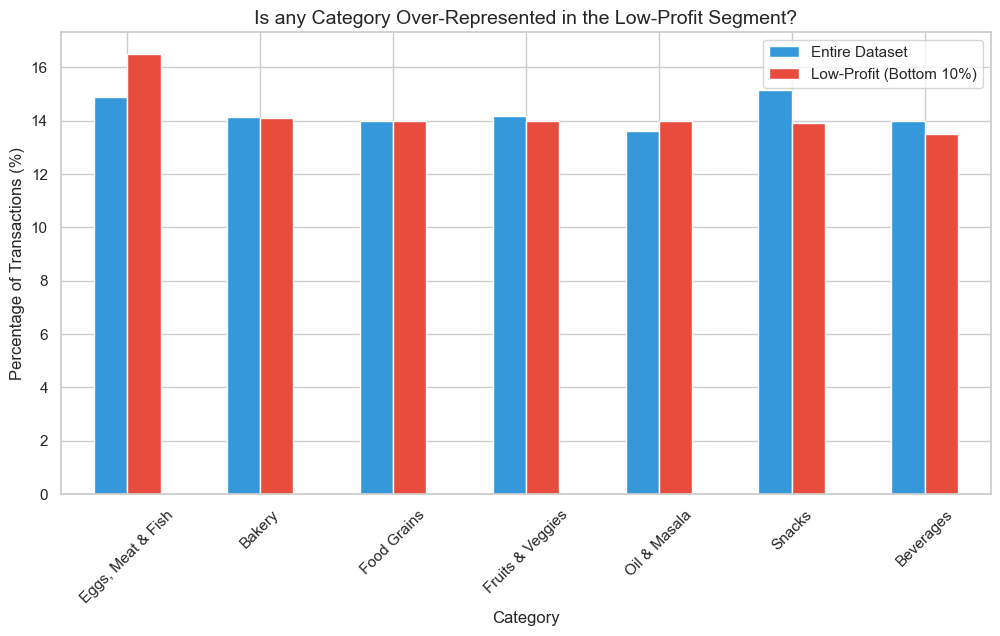

In [21]:
# 1. Distribution of Categories in the Low-Profit Segment
low_profit_category = low_profit_df['Category'].value_counts(normalize=True) * 100

# 2. Compare against the Overall Category Distribution
overall_category = df['Category'].value_counts(normalize=True) * 100

# 3. Create a Comparison Table
category_comparison = pd.DataFrame({
    'Overall %': overall_category,
    'Low-Profit %': low_profit_category
}).sort_values(by='Low-Profit %', ascending=False)

print("Category Presence: Overall vs. Low-Profit Segment")
print(category_comparison)

# 4. Visualization
plt.figure(figsize=(10,6))
category_comparison.plot(kind='bar', figsize=(12,6), color=['#3498db', '#e74c3c'])
plt.title('Is any Category Over-Represented in the Low-Profit Segment?', fontsize=14)
plt.ylabel('Percentage of Transactions (%)')
plt.xticks(rotation=45)
plt.legend(["Entire Dataset", "Low-Profit (Bottom 10%)"])
plt.show()


### Observation
The Eggs, Meat & Fish category is the only one slightly over-represented in the low-profit segment (16.5% vs. 14.9% overall). While the difference is small, it suggests that this category more frequently results in profits below 107.21 compared to others like Snacks or Beverages, which are under-represented in the low-profit group.

### Interpretation
> Since no single category is "failing," the low profit of that 10% segment is confirmed to be a volume issue (smaller orders) rather than a product issue.

## 9. City Level Analysis

<Figure size 1200x600 with 0 Axes>

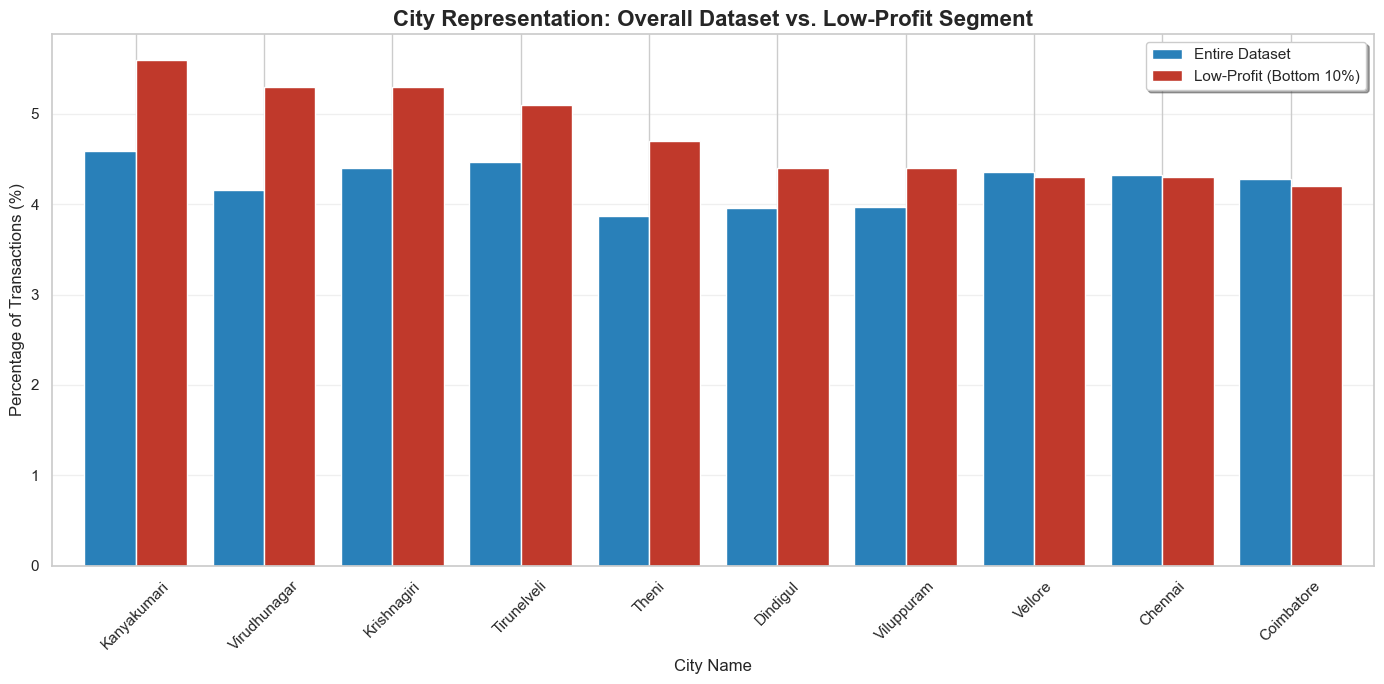

In [22]:
# 1. Distribution of Cities in the Low-Profit Segment
low_profit_city = low_profit_df['City'].value_counts(normalize=True) * 100

# 2. Overall City Distribution for comparison
overall_city = df['City'].value_counts(normalize=True) * 100

# 3. Create Comparison Table (Top 10 most frequent cities for readability)
city_comparison = pd.DataFrame({
    'Overall Market %': overall_city,
    'Low-Profit Segment %': low_profit_city
}).sort_values(by='Low-Profit Segment %', ascending=False).head(10)

# 4. Visualization
plt.figure(figsize=(12, 6))
city_comparison.plot(kind='bar', figsize=(14, 7), color=['#2980b9', '#c0392b'], width=0.8)

plt.title('City Representation: Overall Dataset vs. Low-Profit Segment', fontsize=16, fontweight='bold')
plt.ylabel('Percentage of Transactions (%)', fontsize=12)
plt.xlabel('City Name', fontsize=12)
plt.xticks(rotation=45)
plt.legend(["Entire Dataset", "Low-Profit (Bottom 10%)"], frameon=True, shadow=True)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()


### Interpretation
> Kanyakumari and Virudhunagar are the most underperforming regions, as they contribute a significantly higher share of low-profit orders relative to their overall market presence, likely due to localized logistical costs or aggressive discounting in those areas.

### 10. Time Series Analysis

c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\srinithya\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\srinithya\AppData\Local\Programs\Python\Pyth

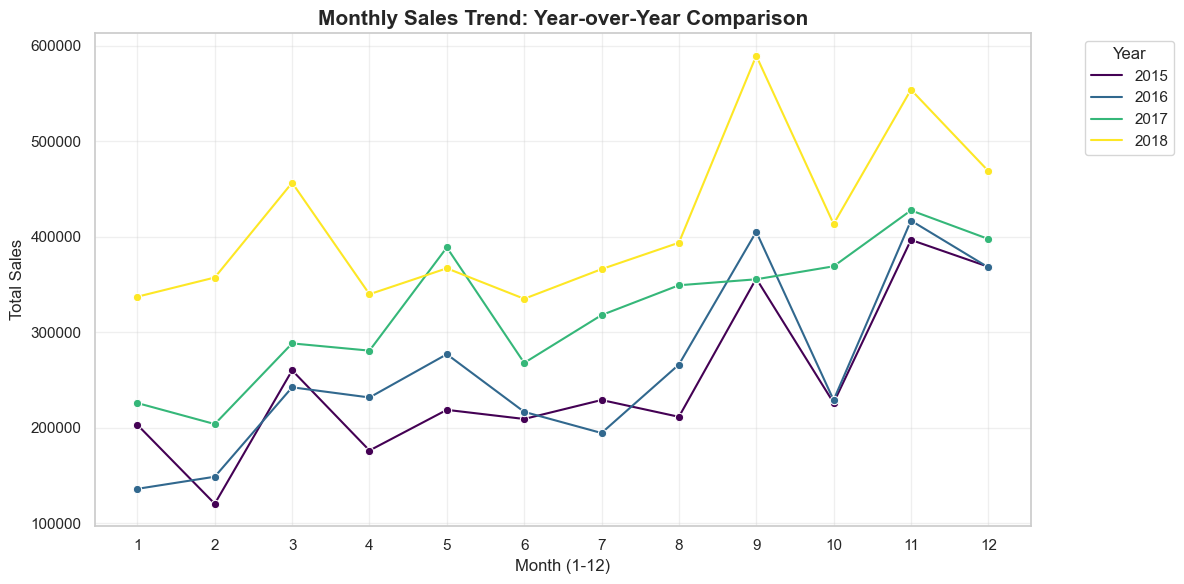

In [23]:
# Ensure date features are integers for clean plotting
df['Order_Year'] = df['Order_Year'].astype(int)
df['Order_Month'] = df['Order_Month'].astype(int)

# Grouping by Year and Month
monthly_trend = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='Order_Month', y='Sales', hue='Order_Year', marker='o', palette='viridis')

plt.title('Monthly Sales Trend: Year-over-Year Comparison', fontsize=15, fontweight='bold')
plt.xlabel('Month (1-12)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Interpretation
> The business has achieved remarkable year-over-year growth, specifically peaking during the November festive season while maintaining a consistent seasonal rhythm that allows for predictable inventory planning.

### 11. General Profitability Analysis

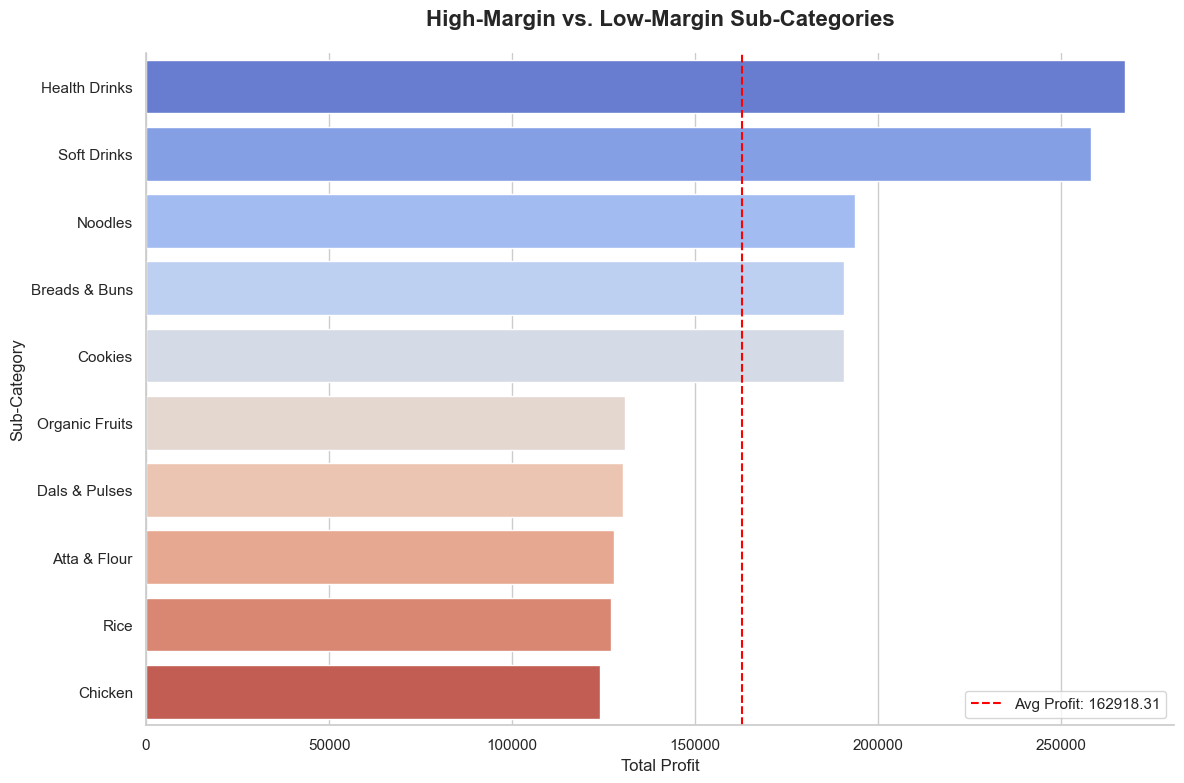

In [25]:
# 1. Group and sort the data
subcat_profit = df.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False)

# 2. Combine Top 5 and Bottom 5
top_bottom_df = pd.concat([subcat_profit.head(5), subcat_profit.tail(5)])

# 3. Create the Visualization
plt.figure(figsize=(12, 8))
# Using a diverging palette (coolwarm) to distinguish top from bottom
sns.barplot(x=top_bottom_df.values, y=top_bottom_df.index, palette='coolwarm')

# 4. Styling for clarity
plt.title('High-Margin vs. Low-Margin Sub-Categories', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.axvline(subcat_profit.mean(), color='red', linestyle='--', label=f'Avg Profit: {subcat_profit.mean():.2f}')
plt.legend()
sns.despine()
plt.tight_layout()

plt.show()



### Interpretation
> Health and Soft Drinks are the clear profit leaders, significantly exceeding the average profitability, while kitchen essentials like Rice, Atta, and Chicken underperform, highlighting a business model where processed goods subsidize low-margin raw staples.


## 12. Discount Sensitivity by Tier

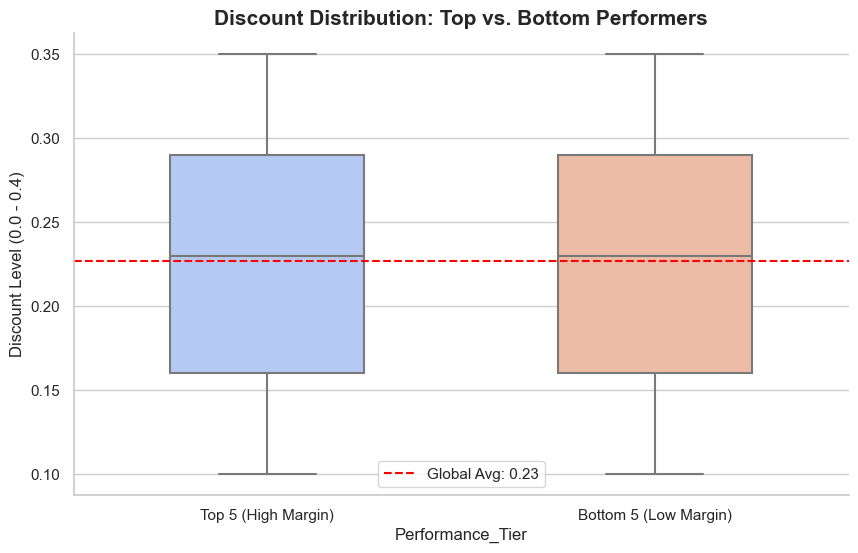

In [27]:

plt.figure(figsize=(10, 6))
# A boxplot or violin plot shows the 'tiers' (0.1, 0.2, etc.) better than a flat bar
sns.boxplot(data=tier_data, x='Performance_Tier', y='Discount', palette='coolwarm', width=0.5)

# Add the mean line explicitly for comparison
plt.axhline(df['Discount'].mean(), color='red', linestyle='--', label=f'Global Avg: {df["Discount"].mean():.2f}')

plt.title('Discount Distribution: Top vs. Bottom Performers', fontsize=15, fontweight='bold')
plt.ylabel('Discount Level (0.0 - 0.4)')
plt.legend()
sns.despine()
plt.show()



### Interpretation
> This boxplot confirms that discounting is not the cause of low profitability for the bottom performers. Both the High-Margin (Top 5) and Low-Margin (Bottom 5) sub-categories share nearly identical discount structures.

## Final Summary
- The business is in a strong growth phase with a disciplined, tiered discount strategy that maintains 100% profitability across all 9,994 transactions.
- uture profitability hinges on increasing "basket size" and optimizing logistics in underperforming regions like Kanyakumari, rather than adjusting current discount levels.